In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

In [2]:
hpw = pd.read_csv("HPW.csv")

In [3]:
hpw.head()

,HPW Data collection matrix,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Vessel,Area,Date,TASK,SQFT,Time for Work,# of Painters,# of Shifts,Length of Shift,Calculated Hours,Unadjusted Production Rate,Crew Chief Hours,Total Hours,Adjusted Rate,Difficulty,Adjusted Production Rate,Lessons learned
3,Encinal,NaN,7/13/2016,LMG,"2,329",32,2,2,6,NaN,72.8,8,40,58,NaN,NaN,Lost one hour to refuel HPW machine during Swi...
4,Alcatraz Islander,NaN,5/3/2016,LMG,"2,964",39,4,1,4.5,NaN,76.0,2,41,72,NaN,NaN,NaN


In [4]:
hpw = hpw.dropna(thresh=2)
hpw.head()

,HPW Data collection matrix,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
2,Vessel,Area,Date,TASK,SQFT,Time for Work,# of Painters,# of Shifts,Length of Shift,Calculated Hours,Unadjusted Production Rate,Crew Chief Hours,Total Hours,Adjusted Rate,Difficulty,Adjusted Production Rate,Lessons learned
3,Encinal,NaN,7/13/2016,LMG,"2,329",32,2,2,6,NaN,72.8,8,40,58,NaN,NaN,Lost one hour to refuel HPW machine during Swi...
4,Alcatraz Islander,NaN,5/3/2016,LMG,"2,964",39,4,1,4.5,NaN,76.0,2,41,72,NaN,NaN,NaN
5,Brownlee,NaN,8/22/2016,LMG,"2,114",24,2,1,8,NaN,88.1,8,32,66,NaN,NaN,NaN
6,Amazing Grace,NaN,7/9/2016,LMG,"1,863",15,2,1,8,NaN,124.2,NaN,15,124,NaN,NaN,NaN


In [5]:
hpw.columns = hpw.iloc[0]
hpw.head()

2,Vessel,Area,Date,TASK,SQFT,Time for Work,# of Painters,# of Shifts,Length of Shift,Calculated Hours,Unadjusted Production Rate,Crew Chief Hours,Total Hours,Adjusted Rate,Difficulty,Adjusted Production Rate,Lessons learned
2,Vessel,Area,Date,TASK,SQFT,Time for Work,# of Painters,# of Shifts,Length of Shift,Calculated Hours,Unadjusted Production Rate,Crew Chief Hours,Total Hours,Adjusted Rate,Difficulty,Adjusted Production Rate,Lessons learned
3,Encinal,NaN,7/13/2016,LMG,"2,329",32,2,2,6,NaN,72.8,8,40,58,NaN,NaN,Lost one hour to refuel HPW machine during Swi...
4,Alcatraz Islander,NaN,5/3/2016,LMG,"2,964",39,4,1,4.5,NaN,76.0,2,41,72,NaN,NaN,NaN
5,Brownlee,NaN,8/22/2016,LMG,"2,114",24,2,1,8,NaN,88.1,8,32,66,NaN,NaN,NaN
6,Amazing Grace,NaN,7/9/2016,LMG,"1,863",15,2,1,8,NaN,124.2,NaN,15,124,NaN,NaN,NaN


In [6]:
hpw = hpw.drop(2)
hpw.head()

2,Vessel,Area,Date,TASK,SQFT,Time for Work,# of Painters,# of Shifts,Length of Shift,Calculated Hours,Unadjusted Production Rate,Crew Chief Hours,Total Hours,Adjusted Rate,Difficulty,Adjusted Production Rate,Lessons learned
3,Encinal,NaN,7/13/2016,LMG,"2,329",32,2,2,6,NaN,72.8,8,40,58,NaN,NaN,Lost one hour to refuel HPW machine during Swi...
4,Alcatraz Islander,NaN,5/3/2016,LMG,"2,964",39,4,1,4.5,NaN,76.0,2,41,72,NaN,NaN,NaN
5,Brownlee,NaN,8/22/2016,LMG,"2,114",24,2,1,8,NaN,88.1,8,32,66,NaN,NaN,NaN
6,Amazing Grace,NaN,7/9/2016,LMG,"1,863",15,2,1,8,NaN,124.2,NaN,15,124,NaN,NaN,NaN
7,Lynn Marie,NaN,5/24/2016,LMG,"6,140",48,4,2,8,NaN,127.9,12,60,102,NaN,NaN,NaN


In [7]:
for col in hpw.columns:
    hpw[col] = hpw[col].str.strip()
    hpw[col] = hpw[col].str.replace(',', '')
    try:
        hpw[col] = hpw[col].values.astype(float)
    except:
        pass
hpw.head()

2,Vessel,Area,Date,TASK,SQFT,Time for Work,# of Painters,# of Shifts,Length of Shift,Calculated Hours,Unadjusted Production Rate,Crew Chief Hours,Total Hours,Adjusted Rate,Difficulty,Adjusted Production Rate,Lessons learned
3,Encinal,NaN,7/13/2016,LMG,2329.0,32.0,2.0,2.0,6.0,NaN,72.8,8.0,40.0,58.0,NaN,NaN,Lost one hour to refuel HPW machine during Swi...
4,Alcatraz Islander,NaN,5/3/2016,LMG,2964.0,39.0,4.0,1.0,4.5,NaN,76.0,2.0,41.0,72.0,NaN,NaN,NaN
5,Brownlee,NaN,8/22/2016,LMG,2114.0,24.0,2.0,1.0,8.0,NaN,88.1,8.0,32.0,66.0,NaN,NaN,NaN
6,Amazing Grace,NaN,7/9/2016,LMG,1863.0,15.0,2.0,1.0,8.0,NaN,124.2,NaN,15.0,124.0,NaN,NaN,NaN
7,Lynn Marie,NaN,5/24/2016,LMG,6140.0,48.0,4.0,2.0,8.0,NaN,127.9,12.0,60.0,102.0,NaN,NaN,NaN


In [8]:
hpw.describe()

2,Area,SQFT,Time for Work,# of Painters,# of Shifts,Length of Shift,Calculated Hours,Unadjusted Production Rate,Crew Chief Hours,Total Hours,Adjusted Rate,Difficulty,Adjusted Production Rate
count,0.0,63.000000,63.000000,60.000000,60.000000,60.000000,52.000000,63.000000,33.000000,63.000000,63.000000,0.0,0.0
mean,NaN,7854.317460,28.158730,2.616667,1.550000,6.554167,27.759615,279.438095,3.196970,29.833333,270.177778,NaN,NaN
std,NaN,9136.944341,20.417038,0.953880,0.680852,1.552125,20.616120,149.009028,5.640173,22.198109,148.041058,NaN,NaN
min,NaN,984.000000,4.500000,1.000000,1.000000,2.250000,0.000000,61.500000,0.000000,4.500000,58.000000,NaN,NaN
25%,NaN,3300.000000,14.000000,2.000000,1.000000,6.000000,12.750000,176.150000,0.000000,14.000000,162.000000,NaN,NaN
50%,NaN,4700.000000,20.000000,2.000000,1.500000,7.000000,24.000000,258.900000,0.000000,24.000000,255.900000,NaN,NaN
75%,NaN,8610.000000,37.375000,3.000000,2.000000,8.000000,37.000000,341.500000,5.000000,40.000000,341.500000,NaN,NaN
max,NaN,54468.000000,98.000000,5.000000,4.000000,8.000000,96.000000,908.800000,22.000000,120.000000,909.000000,NaN,NaN


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
hpw = hpw.sample(frac=1)
hpw.head()

2,Vessel,Area,Date,TASK,SQFT,Time for Work,# of Painters,# of Shifts,Length of Shift,Calculated Hours,Unadjusted Production Rate,Crew Chief Hours,Total Hours,Adjusted Rate,Difficulty,Adjusted Production Rate,Lessons learned
32,Barge 105,NaN,1/4/2017,LMG,3700.0,18.0,3.0,1.0,6.0,18.0,205.6,NaN,18.0,206.0,NaN,NaN,NaN
47,PV California,NaN,4/25/2017,LMG,4434.0,16.0,2.0,1.0,8.0,16.0,277.1,0.0,16.0,277.0,NaN,NaN,Swing shift
50,Potomac,NaN,5/4/2017,HMG,4700.0,37.0,2.0,3.0,6.0,36.0,127.0,0.0,37.0,127.0,NaN,NaN,high difficulty
8,Harbor Emperor,NaN,6/8/2016,LMG,4400.0,20.0,3.0,1.5,8.0,NaN,220.0,10.0,30.0,147.0,NaN,NaN,Started on swing finished in first 4 hours of ...
11,PV San Francisco,NaN,7/25/2016,LMG,5207.0,12.0,2.0,1.0,6.0,NaN,433.9,NaN,12.0,434.0,NaN,NaN,NaN


In [11]:
hpw.shape

(64, 17)

In [12]:
64 * .8

51.2

In [13]:
train = hpw.iloc[0:51][[" SQFT ", "Total Hours", "Calculated Hours"]].dropna()

In [14]:
train.head()

2,SQFT,Total Hours,Calculated Hours
32,3700.0,18.0,18.0
47,4434.0,16.0,16.0
50,4700.0,37.0,36.0
60,54468.0,120.0,96.0
28,9620.0,27.0,28.0


In [15]:
test = hpw.iloc[51:][[" SQFT ", "Total Hours", "Calculated Hours"]].dropna()

In [16]:
test.head()

2,SQFT,Total Hours,Calculated Hours
55,40692.0,62.0,72.0
53,1400.0,8.0,8.0
17,7989.0,53.0,48.0
39,5868.0,40.0,42.0
23,2510.0,12.0,12.0


In [17]:
X = np.array(train[' SQFT ']).reshape(-1, 1)
y = train["Total Hours"]
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.668817524543202

In [18]:
X_test = np.array(test[' SQFT ']).reshape(-1, 1)
y_test = test["Total Hours"]
reg.score(X_test, y_test)

0.5969754859882657

In [19]:
test['model'] = reg.predict(X_test)
test.head()

2,SQFT,Total Hours,Calculated Hours,model
55,40692.0,62.0,72.0,89.586904
53,1400.0,8.0,8.0,15.319908
17,7989.0,53.0,48.0,27.773976
39,5868.0,40.0,42.0,23.765010
23,2510.0,12.0,12.0,17.417953


In [20]:
import matplotlib.pyplot as plt

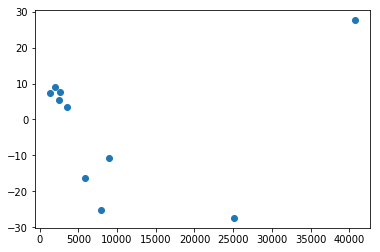

In [21]:
plt.scatter(test[" SQFT "], test['model'] - test["Total Hours"].values.astype(float));

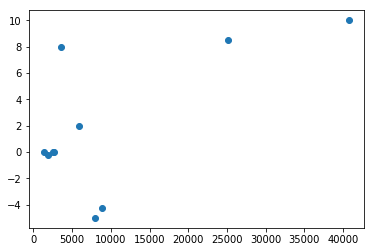

In [22]:
plt.scatter(test[" SQFT "], test['Calculated Hours'].values.astype(float) - test["Total Hours"].values.astype(float));

In [23]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X, y) 
neigh.score(X, y)

0.7555343891808666

In [24]:
neigh.score(X_test, y_test)

0.660422589363596

In [25]:
test["KNN model"] = neigh.predict(X_test)

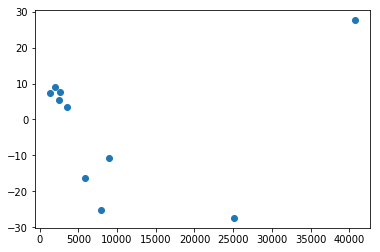

In [26]:
plt.scatter(test[" SQFT "], test['model'] - test["Total Hours"].values.astype(float));

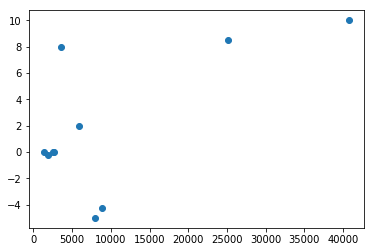

In [27]:
plt.scatter(test[" SQFT "], test['Calculated Hours'].values.astype(float) - test["Total Hours"].values.astype(float));

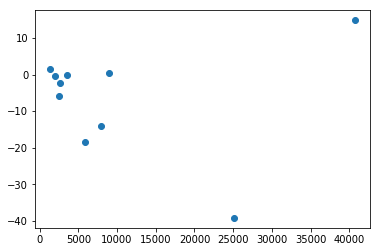

In [28]:
plt.scatter(test[" SQFT "], test['KNN model'].values.astype(float) - test["Total Hours"].values.astype(float));

In [29]:
test.dropna()

2,SQFT,Total Hours,Calculated Hours,model,KNN model
55,40692.0,62.00,72.0,89.586904,76.833333
53,1400.0,8.00,8.0,15.319908,9.500000
17,7989.0,53.00,48.0,27.773976,39.000000
39,5868.0,40.00,42.0,23.765010,21.666667
23,2510.0,12.00,12.0,17.417953,6.166667
21,2654.0,10.00,10.0,17.690132,7.666667
46,25100.0,87.50,96.0,60.115994,48.333333
48,1950.0,7.25,7.0,16.359480,6.833333
62,8910.0,40.25,36.0,29.514786,40.666667
66,3600.0,16.00,24.0,19.478195,16.000000


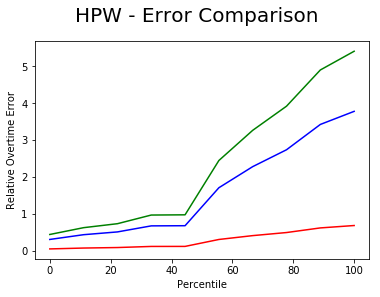

In [30]:
y_predpr = test['Calculated Hours'].values.astype(float)
Y_val = test["Total Hours"]
y_pred = test['model']
y_3 = test['KNN model']
predpr_error = np.max(Y_val - y_predpr,0)/ Y_val
pred_error = np.max(Y_val - y_pred, 0)/Y_val
p_33 = np.max(Y_val - y_3, 0)/Y_val
predpr_error = np.sort(predpr_error)
pred_error = np.sort(pred_error)
p_3 = np.sort(p_33)
f = plt.figure()
plt.plot(np.linspace(0,100,len(predpr_error)),predpr_error, color='red')
plt.plot(np.linspace(0,100,len(pred_error)),pred_error, color='blue')
plt.plot(np.linspace(0,100,len(pred_error)),p_3, color='green')
f.suptitle('HPW - Error Comparison',fontsize=20, y = 1.0)
plt.xlabel('Percentile')
plt.ylabel('Relative Overtime Error')
plt.savefig('test2.jpg', transparent=True)
plt.show()

In [31]:
br = pd.read_csv("B&R.csv")
br.head()

,B&R Data collection matrix,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Vessel,Area,Date,Non Skid Y/N,Spots/ Full,SQFT,Time for Work,# of Painters,# of Shifts,Length of Shift,Calculated Hours,Unadjusted Production Rate,Crew Chief Hours,Total Hours,Adjusted Rate,NaN,Applicaton Method,Difficulty,Adjusted Production Rate,Lessons learned
3,Klihyam,Freeboard / Spots,8/2/2016,N,S,"2,350",44,NaN,NaN,NaN,NaN,53.4,NaN,44,53.4,NaN,NaN,NaN,NaN,NaN
4,Brownlee,FB Spots/ Full,8/30/2016,N,S/F,"3,300",68.5,4,3,8,96,48.2,11,79.5,41.5,NaN,NaN,NaN,NaN,Some painters worked only half shift during in...


In [32]:
br = br.dropna(thresh=2)
br.head()

,B&R Data collection matrix,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
2,Vessel,Area,Date,Non Skid Y/N,Spots/ Full,SQFT,Time for Work,# of Painters,# of Shifts,Length of Shift,Calculated Hours,Unadjusted Production Rate,Crew Chief Hours,Total Hours,Adjusted Rate,NaN,Applicaton Method,Difficulty,Adjusted Production Rate,Lessons learned
3,Klihyam,Freeboard / Spots,8/2/2016,N,S,"2,350",44,NaN,NaN,NaN,NaN,53.4,NaN,44,53.4,NaN,NaN,NaN,NaN,NaN
4,Brownlee,FB Spots/ Full,8/30/2016,N,S/F,"3,300",68.5,4,3,8,96,48.2,11,79.5,41.5,NaN,NaN,NaN,NaN,Some painters worked only half shift during in...
5,Lynn Marie,UWH,6/3/2016,N,F,"6,949",86,NaN,NaN,NaN,NaN,80.8,NaN,86,80.8,NaN,NaN,NaN,NaN,NaN
6,Klihyam,UWH,8/2/2016,N,F,"7,835",65,3,2,8,48,120.5,NaN,65,120.5,NaN,NaN,NaN,NaN,"Partial shift during the day, and several addi..."


In [33]:
br.columns = br.iloc[0]
br.head()

2,Vessel,Area,Date,Non Skid Y/N,Spots/ Full,SQFT,Time for Work,# of Painters,# of Shifts,Length of Shift,Calculated Hours,Unadjusted Production Rate,Crew Chief Hours,Total Hours,Adjusted Rate,nan,Applicaton Method,Difficulty,Adjusted Production Rate,Lessons learned
2,Vessel,Area,Date,Non Skid Y/N,Spots/ Full,SQFT,Time for Work,# of Painters,# of Shifts,Length of Shift,Calculated Hours,Unadjusted Production Rate,Crew Chief Hours,Total Hours,Adjusted Rate,NaN,Applicaton Method,Difficulty,Adjusted Production Rate,Lessons learned
3,Klihyam,Freeboard / Spots,8/2/2016,N,S,"2,350",44,NaN,NaN,NaN,NaN,53.4,NaN,44,53.4,NaN,NaN,NaN,NaN,NaN
4,Brownlee,FB Spots/ Full,8/30/2016,N,S/F,"3,300",68.5,4,3,8,96,48.2,11,79.5,41.5,NaN,NaN,NaN,NaN,Some painters worked only half shift during in...
5,Lynn Marie,UWH,6/3/2016,N,F,"6,949",86,NaN,NaN,NaN,NaN,80.8,NaN,86,80.8,NaN,NaN,NaN,NaN,NaN
6,Klihyam,UWH,8/2/2016,N,F,"7,835",65,3,2,8,48,120.5,NaN,65,120.5,NaN,NaN,NaN,NaN,"Partial shift during the day, and several addi..."


In [34]:
br = br.drop(2)
br.head()

2,Vessel,Area,Date,Non Skid Y/N,Spots/ Full,SQFT,Time for Work,# of Painters,# of Shifts,Length of Shift,Calculated Hours,Unadjusted Production Rate,Crew Chief Hours,Total Hours,Adjusted Rate,nan,Applicaton Method,Difficulty,Adjusted Production Rate,Lessons learned
3,Klihyam,Freeboard / Spots,8/2/2016,N,S,"2,350",44,NaN,NaN,NaN,NaN,53.4,NaN,44,53.4,NaN,NaN,NaN,NaN,NaN
4,Brownlee,FB Spots/ Full,8/30/2016,N,S/F,"3,300",68.5,4,3,8,96,48.2,11,79.5,41.5,NaN,NaN,NaN,NaN,Some painters worked only half shift during in...
5,Lynn Marie,UWH,6/3/2016,N,F,"6,949",86,NaN,NaN,NaN,NaN,80.8,NaN,86,80.8,NaN,NaN,NaN,NaN,NaN
6,Klihyam,UWH,8/2/2016,N,F,"7,835",65,3,2,8,48,120.5,NaN,65,120.5,NaN,NaN,NaN,NaN,"Partial shift during the day, and several addi..."
7,Spill Spoiler ii,UWH,7/12/2016,N,F,984,8,2,1,4,8,123.0,NaN,8,123.0,NaN,NaN,NaN,NaN,NaN


In [35]:
for col in br.columns:
    try: 
        br[col] = br[col].str.strip()
        br[col] = br[col].str.replace(',', '')
    except:
        pass
    try:
        br[col] = br[col].values.astype(float)
    except:
        pass
br.head()

2,Vessel,Area,Date,Non Skid Y/N,Spots/ Full,SQFT,Time for Work,# of Painters,# of Shifts,Length of Shift,Calculated Hours,Unadjusted Production Rate,Crew Chief Hours,Total Hours,Adjusted Rate,nan,Applicaton Method,Difficulty,Adjusted Production Rate,Lessons learned
3,Klihyam,Freeboard / Spots,8/2/2016,N,S,2350.0,44.0,NaN,NaN,NaN,NaN,53.4,NaN,44.0,53.4,NaN,NaN,NaN,NaN,NaN
4,Brownlee,FB Spots/ Full,8/30/2016,N,S/F,3300.0,68.5,4.0,3.0,8.0,96.0,48.2,11.0,79.5,41.5,NaN,NaN,NaN,NaN,Some painters worked only half shift during in...
5,Lynn Marie,UWH,6/3/2016,N,F,6949.0,86.0,NaN,NaN,NaN,NaN,80.8,NaN,86.0,80.8,NaN,NaN,NaN,NaN,NaN
6,Klihyam,UWH,8/2/2016,N,F,7835.0,65.0,3.0,2.0,8.0,48.0,120.5,NaN,65.0,120.5,NaN,NaN,NaN,NaN,Partial shift during the day and several addit...
7,Spill Spoiler ii,UWH,7/12/2016,N,F,984.0,8.0,2.0,1.0,4.0,8.0,123.0,NaN,8.0,123.0,NaN,NaN,NaN,NaN,NaN


In [36]:
br = br.dropna(axis=1, how='all')
br.head()

2,Vessel,Area,Date,Non Skid Y/N,Spots/ Full,SQFT,Time for Work,# of Painters,# of Shifts,Length of Shift,Calculated Hours,Unadjusted Production Rate,Crew Chief Hours,Total Hours,Adjusted Rate,Lessons learned
3,Klihyam,Freeboard / Spots,8/2/2016,N,S,2350.0,44.0,NaN,NaN,NaN,NaN,53.4,NaN,44.0,53.4,NaN
4,Brownlee,FB Spots/ Full,8/30/2016,N,S/F,3300.0,68.5,4.0,3.0,8.0,96.0,48.2,11.0,79.5,41.5,Some painters worked only half shift during in...
5,Lynn Marie,UWH,6/3/2016,N,F,6949.0,86.0,NaN,NaN,NaN,NaN,80.8,NaN,86.0,80.8,NaN
6,Klihyam,UWH,8/2/2016,N,F,7835.0,65.0,3.0,2.0,8.0,48.0,120.5,NaN,65.0,120.5,Partial shift during the day and several addit...
7,Spill Spoiler ii,UWH,7/12/2016,N,F,984.0,8.0,2.0,1.0,4.0,8.0,123.0,NaN,8.0,123.0,NaN


In [37]:
br.describe()

2,SQFT,Time for Work,# of Painters,# of Shifts,Length of Shift,Calculated Hours,Unadjusted Production Rate,Crew Chief Hours,Total Hours,Adjusted Rate
count,96.000000,96.000000,94.000000,94.000000,94.000000,39.000000,96.000000,84.000000,96.000000,96.000000
mean,3756.864583,49.367188,2.521277,2.771277,6.696809,62.923077,86.590625,7.613095,56.028646,77.720833
std,2773.084221,38.697561,0.999771,1.891783,1.973573,37.113896,42.165741,7.980908,44.338439,38.180921
min,20.000000,0.500000,1.000000,1.000000,0.500000,8.000000,16.200000,0.000000,0.500000,16.200000
25%,1280.000000,18.250000,2.000000,1.000000,6.000000,36.000000,53.375000,0.000000,18.250000,47.050000
50%,3290.000000,40.500000,2.000000,2.000000,8.000000,56.000000,84.650000,6.750000,44.500000,72.950000
75%,5367.750000,72.625000,3.000000,3.375000,8.000000,96.000000,109.000000,12.250000,86.125000,97.450000
max,11324.000000,161.500000,6.000000,8.000000,8.500000,144.000000,225.500000,41.000000,202.500000,181.600000


In [38]:
df = pd.get_dummies(br['Non Skid Y/N'])
df.head()

,N,Y
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0


In [39]:
df['SQFT'] = br[' SQFT ']
df.head()

,N,Y,SQFT
3,1,0,2350.0
4,1,0,3300.0
5,1,0,6949.0
6,1,0,7835.0
7,1,0,984.0


In [40]:
df["actual time"] = br["Time for Work"]
df.head()

,N,Y,SQFT,actual time
3,1,0,2350.0,44.0
4,1,0,3300.0,68.5
5,1,0,6949.0,86.0
6,1,0,7835.0,65.0
7,1,0,984.0,8.0


In [41]:
df["old guess"] = br["Calculated Hours"]
df.head()

,N,Y,SQFT,actual time,old guess
3,1,0,2350.0,44.0,NaN
4,1,0,3300.0,68.5,96.0
5,1,0,6949.0,86.0,NaN
6,1,0,7835.0,65.0,48.0
7,1,0,984.0,8.0,8.0


In [42]:
df = df.sample(frac=1)
df.head()

,N,Y,SQFT,actual time,old guess
67,1,0,5848.0,62.0,NaN
39,1,0,11229.0,97.5,112.0
37,1,0,4150.0,140.0,144.0
25,1,0,5200.0,30.0,30.0
41,1,0,4494.0,77.5,80.0


In [43]:
df.shape

(96, 5)

In [44]:
96*.8

76.80000000000001

In [45]:
train = df.iloc[:76]
test = df.iloc[76:]

In [46]:
X = np.array(train[['N', 'Y', 'SQFT']])
y = train["actual time"]
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.5858542297247876

In [47]:
X_test = np.array(test[['N', 'Y', 'SQFT']])
y_test = test["actual time"]
reg.score(X_test, y_test)

0.1660644578559778

In [48]:
test['model'] = reg.predict(X_test)
test.head()

/Users/jonathan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,N,Y,SQFT,actual time,old guess,model
68,1,0,5043.0,88.5,NaN,58.721281
84,1,0,250.0,8.0,NaN,11.783076
62,1,0,2100.0,19.0,NaN,29.900263
81,1,0,4788.0,32.0,NaN,56.224047
30,0,1,5330.0,74.5,72.0,100.546173


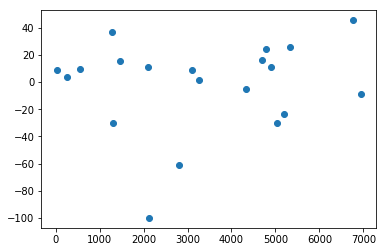

In [49]:
plt.scatter(test["SQFT"], test['model'] - test["actual time"].values.astype(float));

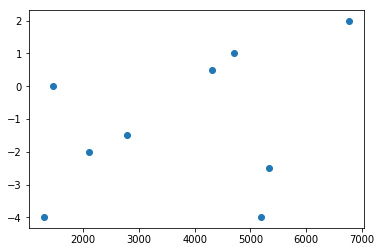

In [50]:
plt.scatter(test["SQFT"], test['old guess'].values.astype(float) - test["actual time"].values.astype(float));

In [51]:
from sklearn.neighbors import KNeighborsRegressor

In [52]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X, y) 
neigh.score(X, y)

0.6751691845766998

In [53]:
neigh.score(X_test, y_test)

0.03965976092313017

In [54]:
test['model KNN'] = neigh.predict(X_test)
test.dropna()

/Users/jonathan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,N,Y,SQFT,actual time,old guess,model,model KNN
30,0,1,5330.0,74.5,72.0,100.546173,74.500000
34,1,0,1300.0,52.0,48.0,22.065804,31.166667
24,1,0,4700.0,39.0,40.0,55.362256,82.666667
13,1,0,2795.0,97.5,96.0,36.706450,30.666667
32,0,1,4320.0,95.5,96.0,90.655168,88.000000
19,1,0,2112.0,130.0,128.0,30.017780,29.500000
16,1,0,1453.0,8.0,8.0,23.564144,30.166667
8,1,0,6764.0,30.0,32.0,75.575161,72.333333
40,1,0,5200.0,84.0,80.0,60.258793,35.000000


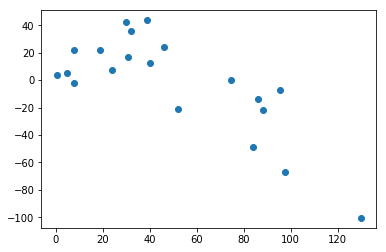

In [55]:
plt.scatter(test["actual time"], test['model KNN'] - test["actual time"].values.astype(float));

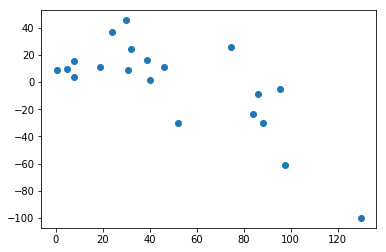

In [56]:
plt.scatter(test["actual time"], test['model'] - test["actual time"].values.astype(float));

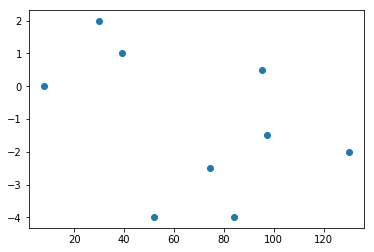

In [57]:
plt.scatter(test["actual time"], test['old guess'].values.astype(float) - test["actual time"].values.astype(float));

In [58]:
y_predpr = test['old guess'].values.astype(float)
Y_val = test["actual time"]
y_pred = test['model']
y_3 = test['model KNN']

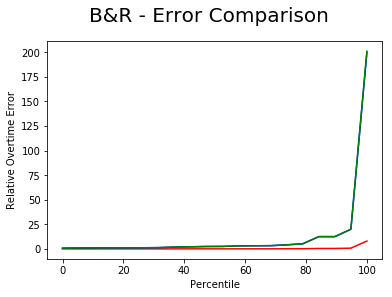

In [59]:
y_predpr = test['old guess'].values.astype(float)
Y_val = test["actual time"]
y_pred = test['model']
y_3 = test['model KNN']
predpr_error = np.max(Y_val - y_predpr,0)/ Y_val
pred_error = np.max(Y_val - y_pred, 0)/Y_val
p_33 = np.max(Y_val - y_3, 0)/Y_val
predpr_error = np.sort(predpr_error)
pred_error = np.sort(pred_error)
p_3 = np.sort(p_33)
f = plt.figure()
plt.plot(np.linspace(0,100,len(predpr_error)),predpr_error, color='red')
plt.plot(np.linspace(0,100,len(pred_error)),pred_error, color='blue')
plt.plot(np.linspace(0,100,len(pred_error)),p_3, color='green')
f.suptitle('B&R - Error Comparison',fontsize=20, y = 1.0)
plt.xlabel('Percentile')
plt.ylabel('Relative Overtime Error')
plt.savefig('test.jpg')
plt.show()